In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [10]:
# Parameters
n_max = 6  # Max number of bosons per site
U = 1.0    # On-site interaction (set to 1 for scaling)
mu_vals = np.linspace(0, n_max * U, 500)  # Chemical potential
t_vals = np.linspace(0.0, 0.1, 500)       # Hopping parameter

# Grid
MU, T = np.meshgrid(mu_vals, t_vals)
phase = np.zeros_like(MU)

In [11]:
def local_hamiltonian(mu, t, psi):
    """Construct the local mean-field Hamiltonian for one site."""
    dim = n_max + 1
    H = np.zeros((dim, dim))
    
    for n in range(dim):
        H[n, n] = 0.5 * U * n * (n - 1) - mu * n
    
    for n in range(1, dim):
        a = np.sqrt(n)
        H[n, n - 1] -= t * psi * a
        H[n - 1, n] -= t * psi * a  # Hermitian conjugate
    
    return H


In [12]:
def self_consistent_psi(mu, t, tol=1e-6, max_iter=100):
    """Find the self-consistent psi for given mu and t."""
    psi = 0.1  # initial guess
    for _ in range(max_iter):
        H = local_hamiltonian(mu, t, psi)
        energies, vecs = eigh(H)
        ground_state = vecs[:, 0]
        n_vals = np.arange(1, n_max + 1)
        new_psi = np.sum(np.sqrt(n_vals) * ground_state[:-1].conj() * ground_state[1:])
        if abs(new_psi - psi) < tol:
            break
        psi = new_psi
    return abs(psi)


In [13]:
# Compute phase diagram
for i in range(len(t_vals)):
    for j in range(len(mu_vals)):
        psi = self_consistent_psi(mu_vals[j], t_vals[i])
        phase[i, j] = psi


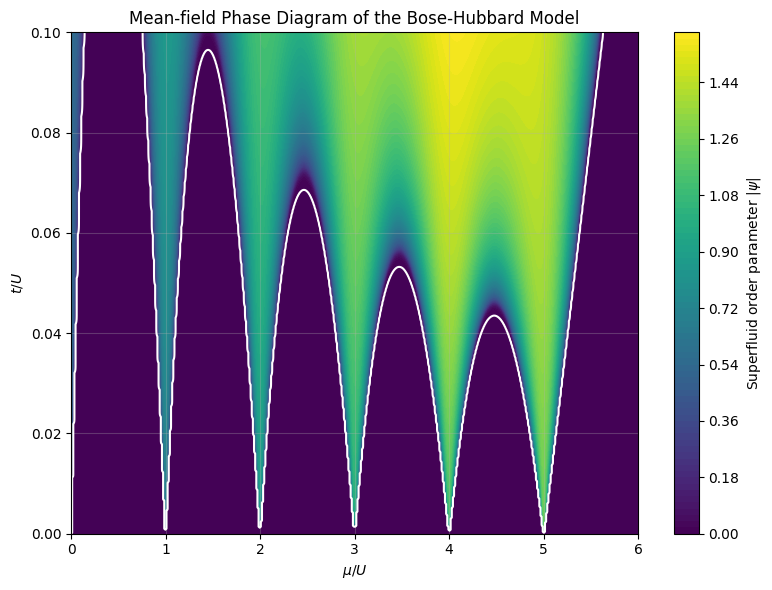

In [14]:
# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(MU / U, T / U, phase, levels=100, cmap='viridis')
plt.colorbar(label=r'Superfluid order parameter $|\psi|$')
plt.contour(MU / U, T / U, phase, levels=[1e-3], colors='white', linewidths=1.5)
plt.xlabel(r'$\mu / U$')
plt.ylabel(r'$t / U$')
plt.title('Mean-field Phase Diagram of the Bose-Hubbard Model')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
